In [24]:
import numpy as np 
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
reviews_df = pd.read_csv("Dataset/reviews.csv")

In [13]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

for index, rows in reviews_df.iterrows():
    print(rows['Comments or Suggestions'])
    reviews_df['sentiment_socre'] = reviews_df['Comments or Suggestions'].apply(get_sentiment)

 "The website is slow and confusing;  they need to improve it urgently." 
The recipes are great, but they  could include more vegetarian  options. 
Excellent customer service; they  always resolve my inquiries quickly. 
The prices are fair, but they should  have more variety of products. 
 "My order arrived incomplete, and  the refund took weeks to process." 
 "The products always arrive fresh  and in good condition; I  recommend them." 
I love the recipes they offer; keep  up the good work! 
They should include more  gluten-free options for people with  intolerances. 
The purchasing process is  confusing, it took me a while to find  what I needed.
 "Good service, but they could  improve the presentation of the  products." 


In [ ]:
sia.polarity_scores()

In [14]:
reviews_df

,User ID,Satisfaction Score,Comments or Suggestions,sentiment_socre
0,1005,2,"""The website is slow and confusing; they nee...",0.2500
1,1006,4,"The recipes are great, but they could include...",0.3716
2,1007,5,Excellent customer service; they always resol...,0.7430
3,1008,3,"The prices are fair, but they should have mor...",0.1655
4,1009,1,"""My order arrived incomplete, and the refund...",0.0000
5,1010,4,"""The products always arrive fresh and in goo...",0.7717
6,1011,5,I love the recipes they offer; keep up the go...,0.8122
7,1012,3,They should include more gluten-free options ...,0.0000
8,1013,2,"The purchasing process is confusing, it took ...",-0.2263
9,1014,4,"""Good service, but they could improve the pr...",0.7003


In [18]:
sentiment = []
def classify_sentiment(score):
    if score > 0.5:
        sentiment.append('Positive')
    elif score > -0.5:
        sentiment.append('Neutral')
    else:
        sentiment.append('Negative')

In [19]:
for index, rows in reviews_df.iterrows():
     classify_sentiment(rows['sentiment_socre'])

In [20]:
sentiment 

['Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive']

In [21]:
reviews_df['Sentiment'] = sentiment

In [22]:
reviews_df

,User ID,Satisfaction Score,Comments or Suggestions,sentiment_socre,Sentiment
0,1005,2,"""The website is slow and confusing; they nee...",0.2500,Neutral
1,1006,4,"The recipes are great, but they could include...",0.3716,Neutral
2,1007,5,Excellent customer service; they always resol...,0.7430,Positive
3,1008,3,"The prices are fair, but they should have mor...",0.1655,Neutral
4,1009,1,"""My order arrived incomplete, and the refund...",0.0000,Neutral
5,1010,4,"""The products always arrive fresh and in goo...",0.7717,Positive
6,1011,5,I love the recipes they offer; keep up the go...,0.8122,Positive
7,1012,3,They should include more gluten-free options ...,0.0000,Neutral
8,1013,2,"The purchasing process is confusing, it took ...",-0.2263,Neutral
9,1014,4,"""Good service, but they could improve the pr...",0.7003,Positive


# EDA

Text(0, 0.5, 'Frequency')

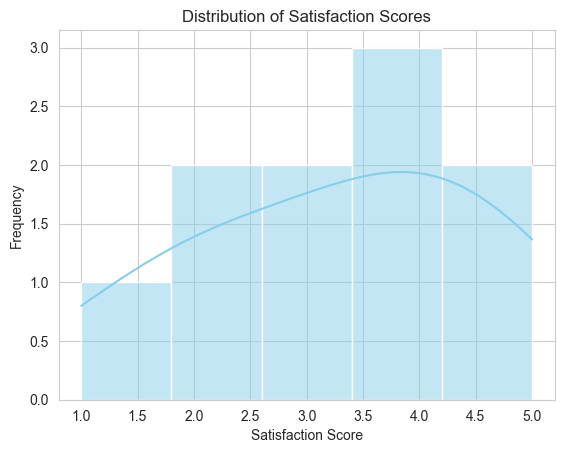

In [38]:
sns.histplot(reviews_df['Satisfaction Score '], kde=True, color='skyblue')
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Sentiment Distribution')

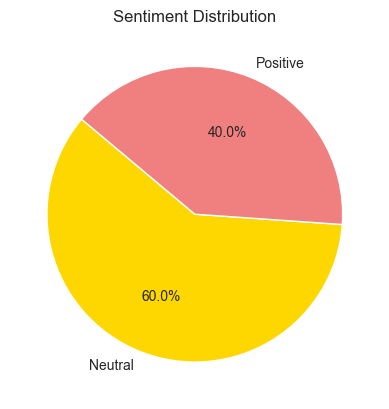

In [39]:
sentiment_counts = reviews_df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution')

d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


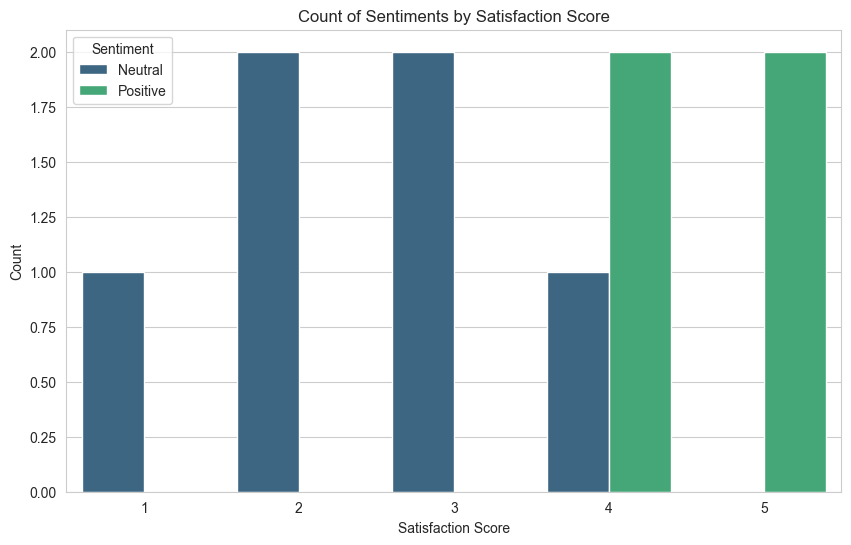

In [47]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction Score ', hue='Sentiment', data=reviews_df, palette='viridis')
plt.title('Count of Sentiments by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Sentiment')

# Show the plot
plt.show()